In [1]:
#https://www.kaggle.com/rockbt1189/eda-l-data-visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("...input/Medical Cost Personal Dataset/Insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.shape)
print(df.describe())
print("Total NO. of null value in the dataset: ",df.isnull().sum())

(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Total NO. of null value in the dataset:  age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
#As per BMI group the rick type i.e. Normal<=24,24.1 to 29.9 Overweight,30 or more Obese
df["risk_type"] = np.where(df.bmi<=24,"Normal",(np.where(df.bmi  <30,"OverWeight","obese")))
df["Age_Group"] = np.where(df.age<25,"Age below 25 year",(np.where(df.age<35, "Age 25 to 34 year" ,
                                                                   (np.where(df.age<55, "Age 35 to 54 year" ,
                                                                             (np.where(df.age<75, "Age 55 to 74 year" ,"Age more then 75 year")))))))

df.head()

,age,sex,bmi,children,smoker,region,charges,risk_type,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,OverWeight,Age below 25 year
1,18,male,33.770,1,no,southeast,1725.55230,obese,Age below 25 year
2,28,male,33.000,3,no,southeast,4449.46200,obese,Age 25 to 34 year
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Age 25 to 34 year
4,32,male,28.880,0,no,northwest,3866.85520,OverWeight,Age 25 to 34 year


In [5]:
df["Charge"]=df["charges"]/1000

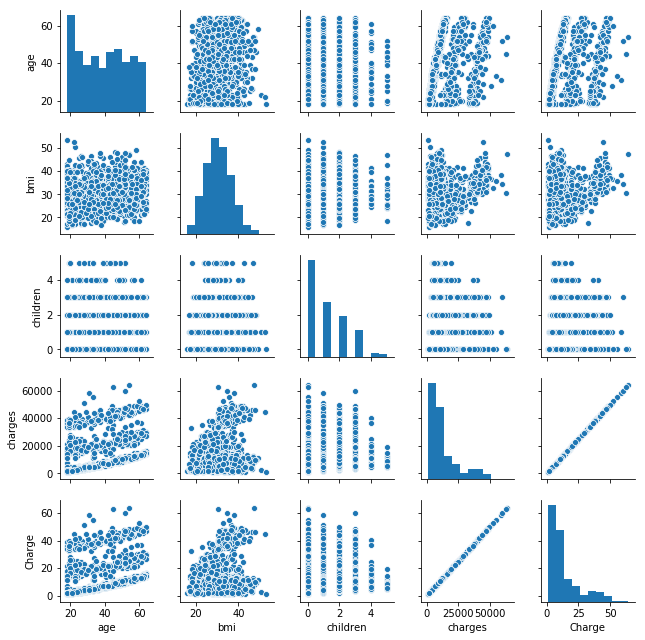

In [6]:
#Correlation:
sns.pairplot(df,height=1.8)

Text(0.5,1,'Age_Group distribution in the data')

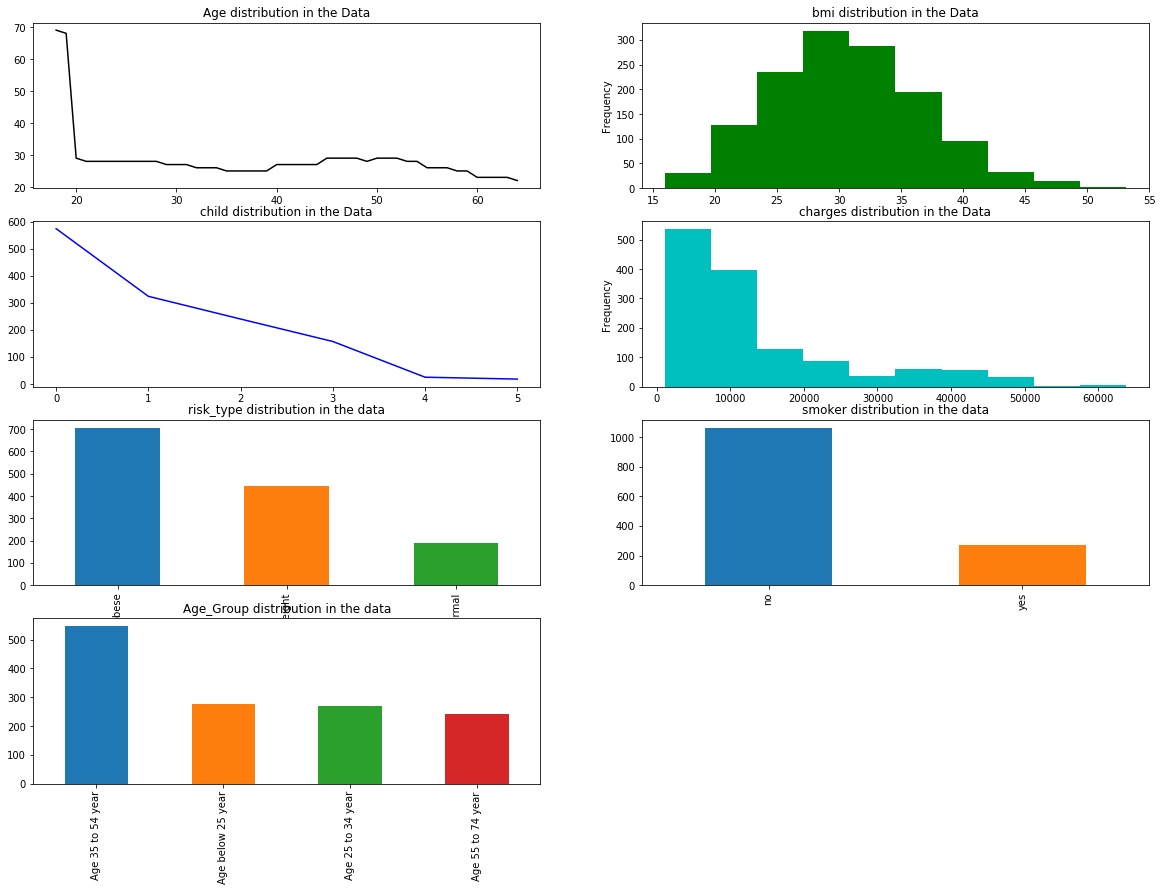

In [7]:
#
plt.rcParams["figure.figsize"] = (20,14)
plt.subplot(421)
df['age'].value_counts().sort_index().plot.line(color="k")
plt.title("Age distribution in the Data")

plt.subplot(422)
df['bmi'].sort_index().plot.hist(color="g")
plt.title("bmi distribution in the Data")

plt.subplot(423)
df['children'].value_counts().plot.line(color="b")
plt.title("child distribution in the Data")

plt.subplot(424)
df['charges'].plot.hist(color="c")
plt.title("charges distribution in the Data")


plt.subplot(425)
df["risk_type"].value_counts().plot.bar()
plt.title("risk_type distribution in the data")

plt.subplot(426)
df["smoker"].value_counts().plot.bar()
plt.title("smoker distribution in the data")

plt.subplot(427)
df["Age_Group"].value_counts().plot.bar()
plt.title("Age_Group distribution in the data")

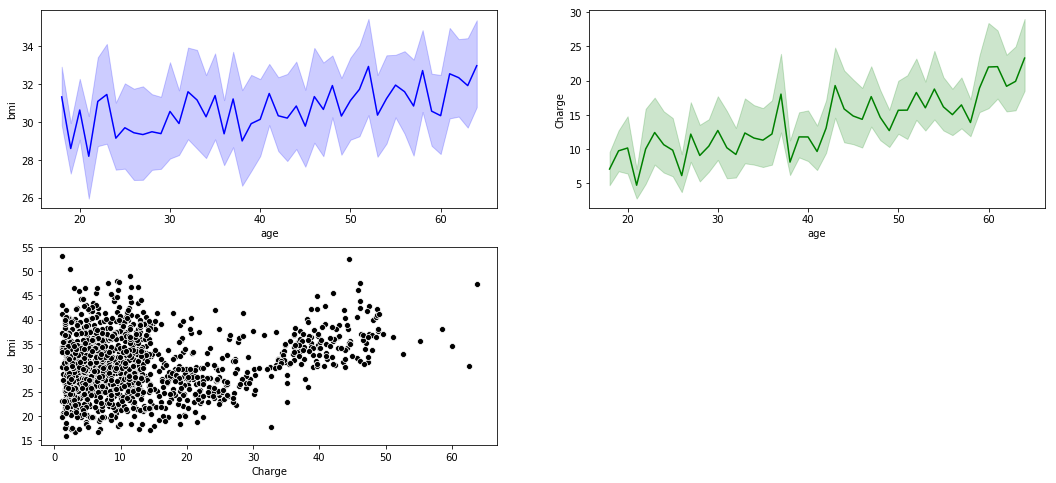

In [8]:
# See Age Vs BMI Vs Charges

plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(221)
sns.lineplot(x="age",y="bmi",data=df,color="b")

plt.subplot(222)
sns.lineplot(x="age",y="Charge",data=df,color="g")

plt.subplot(223)
sns.scatterplot(x="Charge",y="bmi",data=df,color="k")

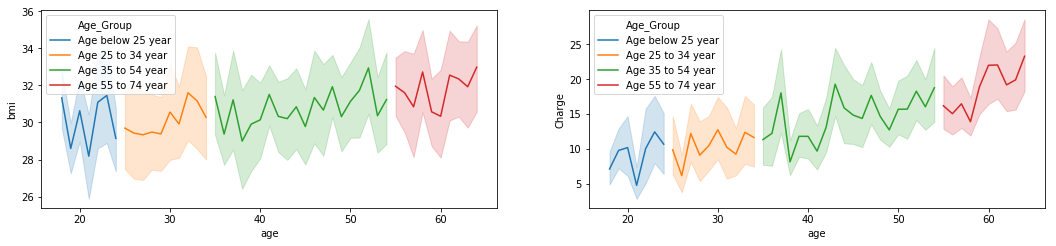

In [9]:
#Age_Group wise BMI and Charges
plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(221)
sns.lineplot(x="age",y="bmi",data=df,hue="Age_Group")

plt.subplot(222)
sns.lineplot(x="age",y="Charge",data=df,hue="Age_Group")

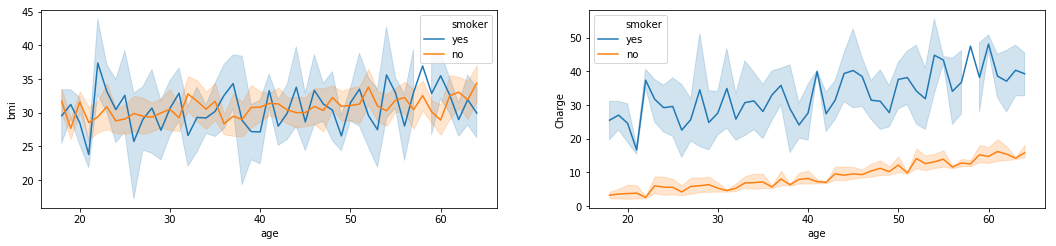

In [10]:
#Smoker wise BMI and Charges
plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(221)
sns.lineplot(x="age",y="bmi",data=df,color="b",hue="smoker")

plt.subplot(222)
sns.lineplot(x="age",y="Charge",data=df,color="g",hue="smoker")

Text(0.5,1,'northeast Region')

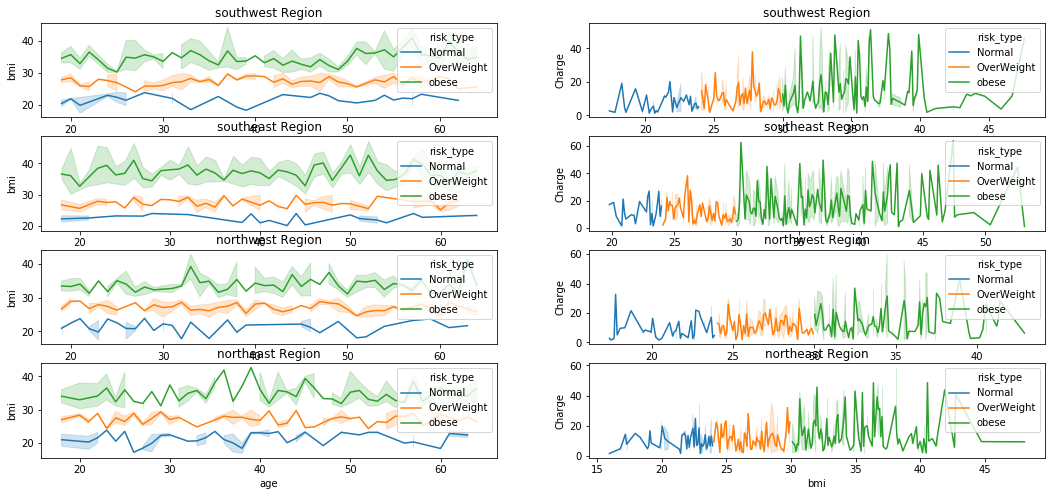

In [11]:
#region wise Age vs BMI and Charges
southwest = df[df["region"]=="southwest"]
southeast = df[df["region"]=="southeast"]
northwest = df[df["region"]=="northwest"]
northeast = df[df["region"]=="northeast"]

plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(421)#region wise Age vs BMI and Charges
southwest = df[df["region"]=="southwest"]
southeast = df[df["region"]=="southeast"]
northwest = df[df["region"]=="northwest"]
northeast = df[df["region"]=="northeast"]

plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(421)
sns.lineplot(x="age",y="bmi",data=southwest,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("southwest Region")
plt.subplot(422)
sns.lineplot(x="bmi",y="Charge",data=southwest,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("southwest Region")

plt.subplot(423)
sns.lineplot(x="age",y="bmi",data=southeast,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("southeast Region")
plt.subplot(424)
sns.lineplot(x="bmi",y="Charge",data=southeast,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("southeast Region")

plt.subplot(425)
sns.lineplot(x="age",y="bmi",data=northwest,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("northwest Region")
plt.subplot(426)
sns.lineplot(x="bmi",y="Charge",data=northwest,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("northwest Region")

plt.subplot(427)
sns.lineplot(x="age",y="bmi",data=northeast,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("northeast Region")
plt.subplot(428)
sns.lineplot(x="bmi",y="Charge",data=northeast,hue="risk_type",hue_order=["Normal","OverWeight","obese"])
plt.title("northeast Region")

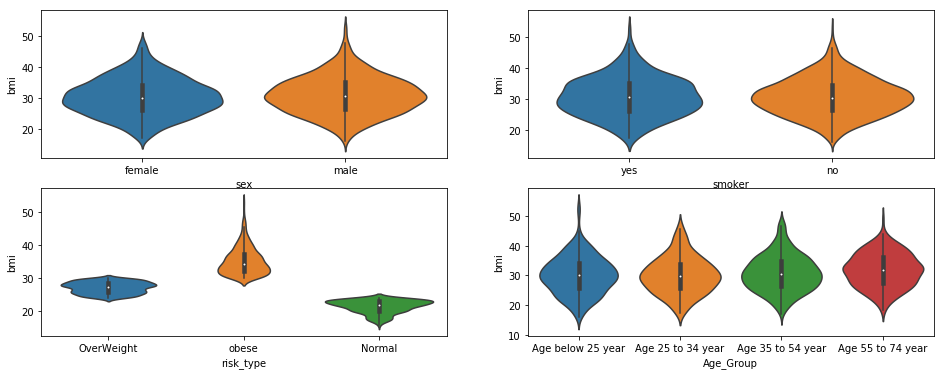

In [12]:
plt.rcParams["figure.figsize"]=(16,6)
plt.subplot(2,2,1)
sns.violinplot(x="sex",y="bmi",data=df)

plt.subplot(2,2,2)
sns.violinplot(x="smoker",y="bmi",data=df)

plt.subplot(2,2,3)
sns.violinplot(x="risk_type",y="bmi",data=df)

plt.subplot(2,2,4)
sns.violinplot(x="Age_Group",y="bmi",data=df)

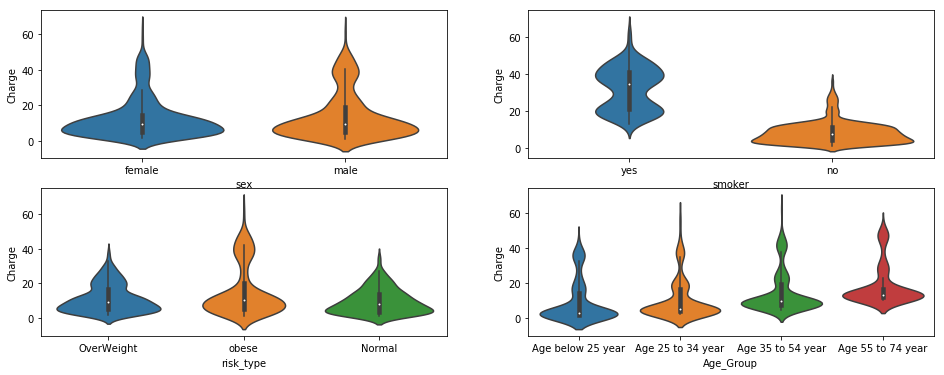

In [13]:
plt.rcParams["figure.figsize"]=(16,6)
plt.subplot(2,2,1)
sns.violinplot(x="sex",y="Charge",data=df)

plt.subplot(2,2,2)
sns.violinplot(x="smoker",y="Charge",data=df)

plt.subplot(2,2,3)
sns.violinplot(x="risk_type",y="Charge",data=df)

plt.subplot(2,2,4)
sns.violinplot(x="Age_Group",y="Charge",data=df)

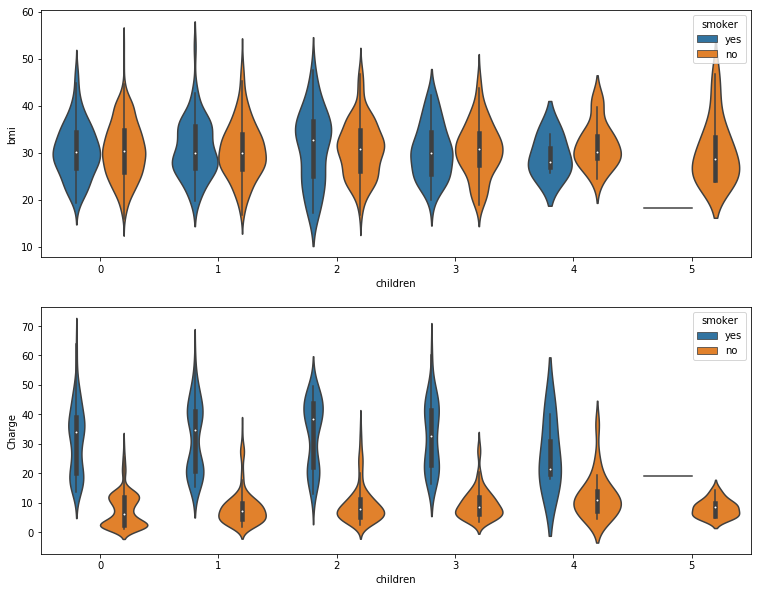

In [14]:
plt.rcParams["figure.figsize"]=(28,10)
plt.subplot(2,2,1)
sns.violinplot(x="children",y="bmi",data=df,hue="smoker")

plt.rcParams["figure.figsize"]=(28,10)
plt.subplot(2,2,3)
sns.violinplot(x="children",y="Charge",data=df,hue="smoker")